In [1]:
subject_id = "400"

manifest_path="/scratch/gilbreth/akamsali/Research/Makin/ecog2txt-pytorch/conf/mocha-1_word_sequence.yaml"

In [ ]:
from ecog2txt_pytorch.trainers.single_subject_trainer import SingleSubjectTrainer

trainer = SingleSubjectTrainer(subject_id=subject_id, manifest_path=manifest_path)

training_metrics = trainer.train_and_evaluate()

In [ ]:
import json
with open('metrics' + subject_id + '.json', 'w') as f:
    json.dump(training_metrics, f)

In [2]:
with open('metrics' + subject_id + '.json', 'r') as fr:
    metrics_loo = json.load(fr)

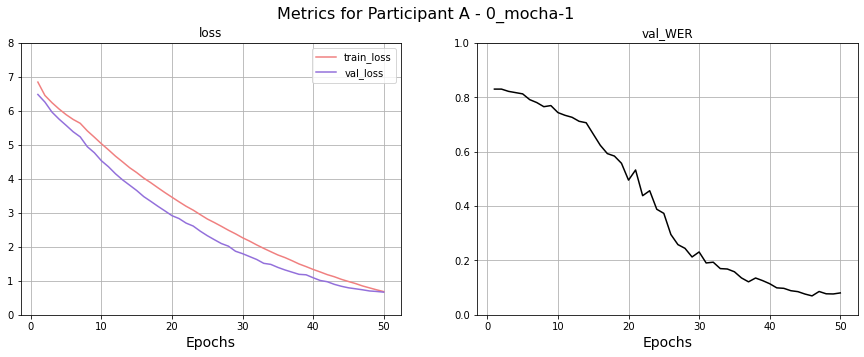

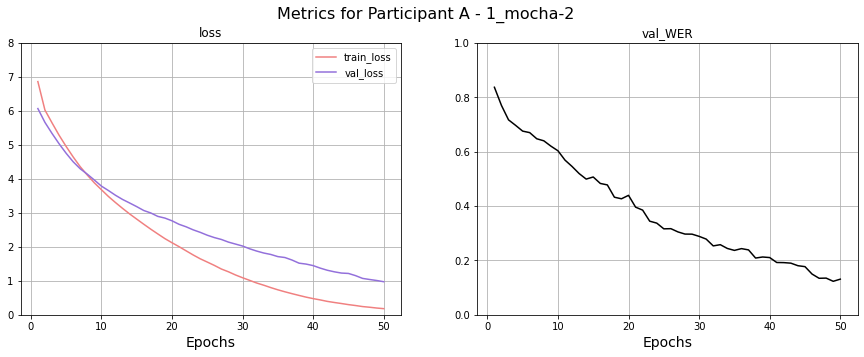

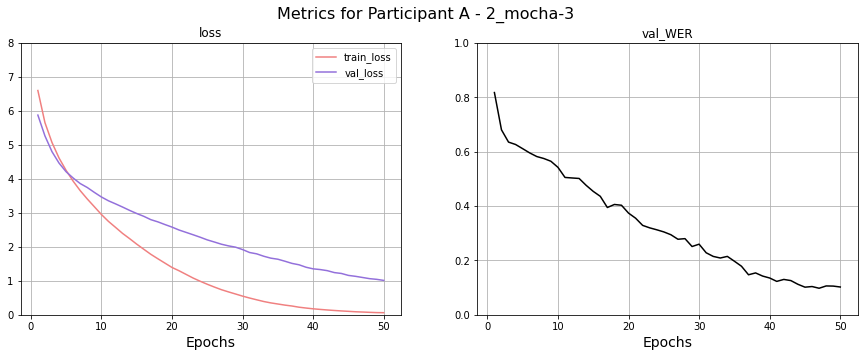

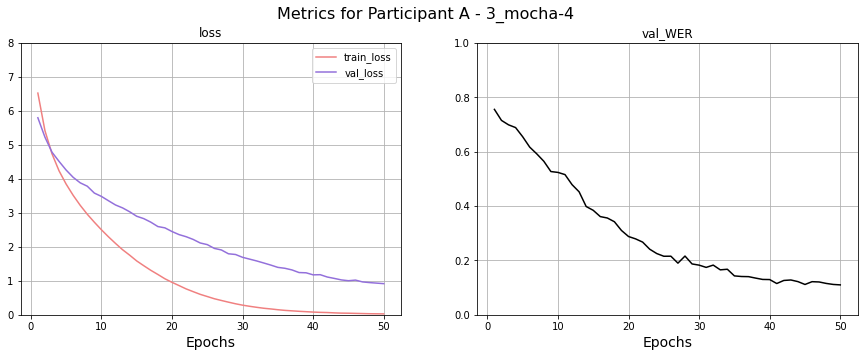

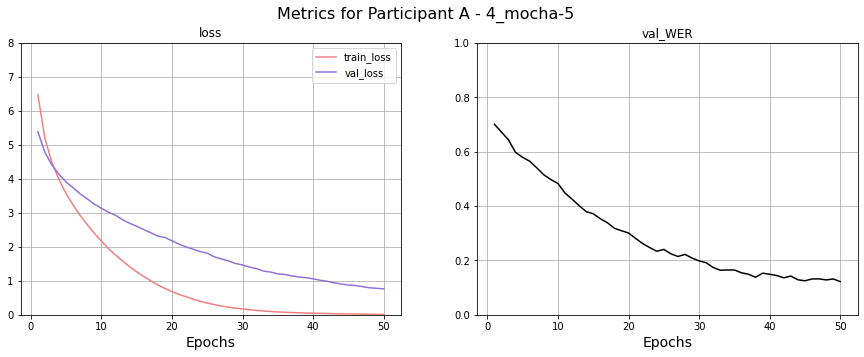

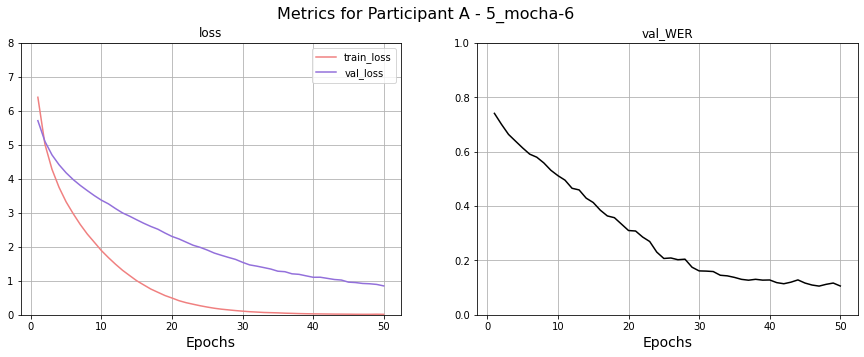

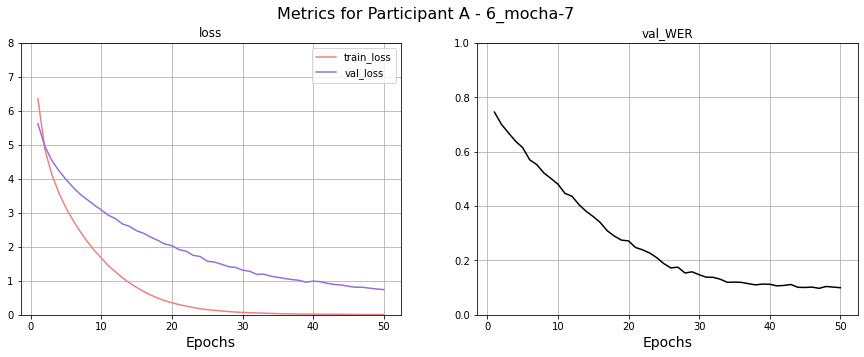

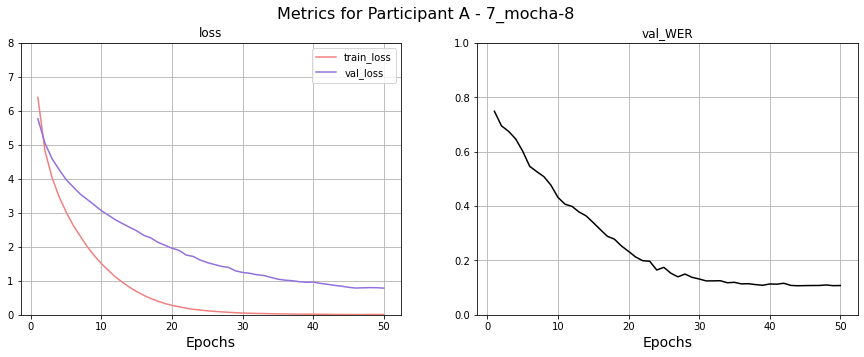

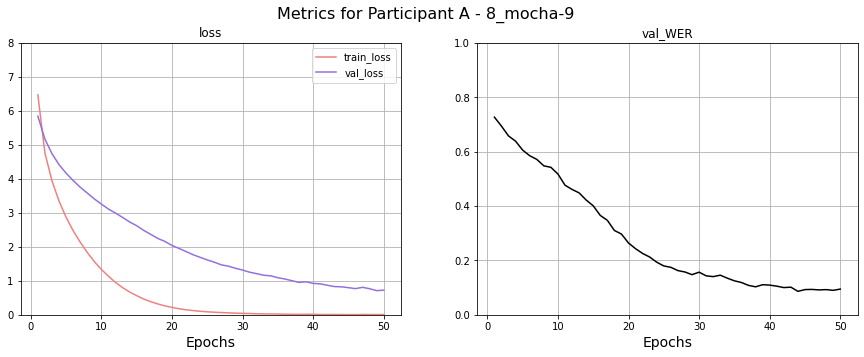

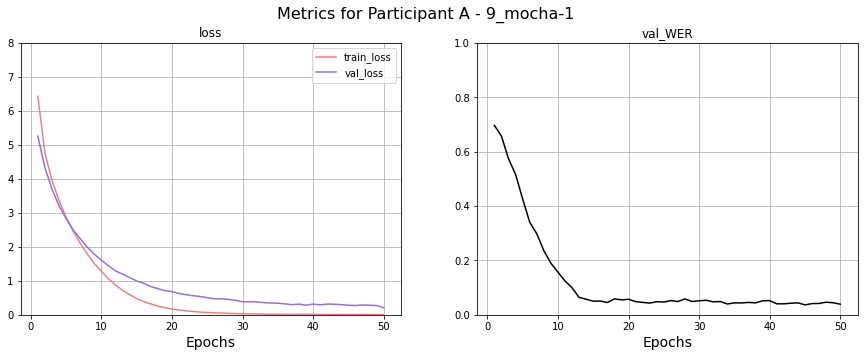

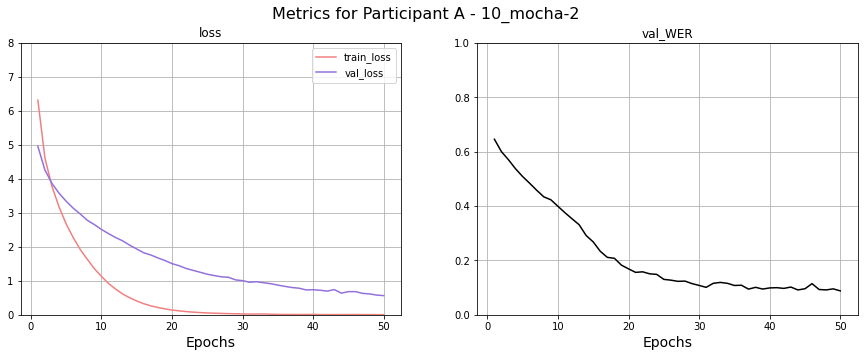

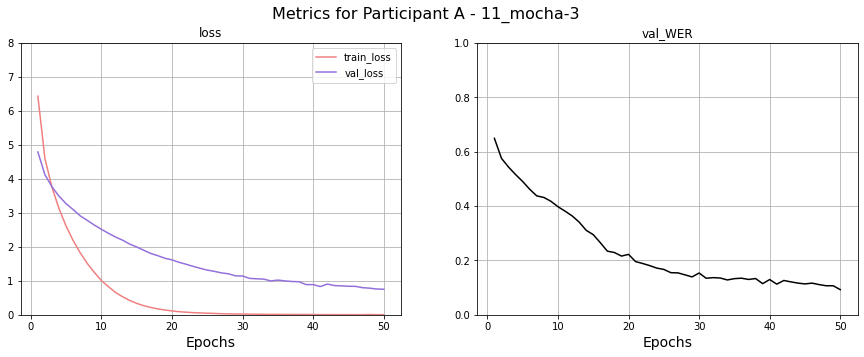

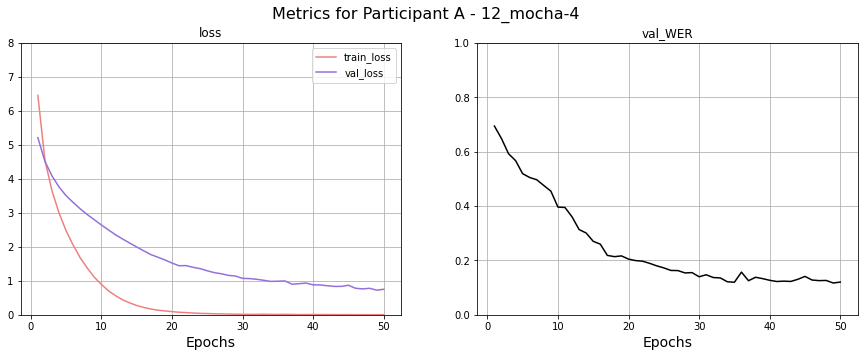

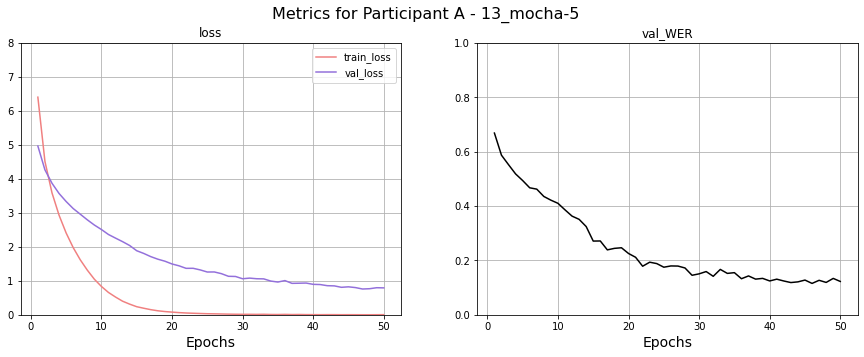

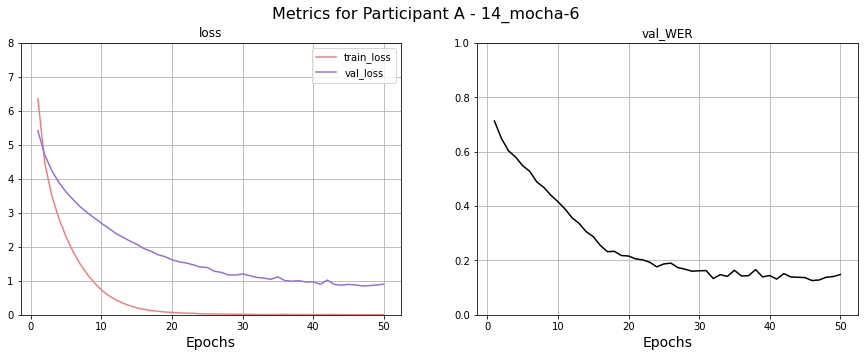

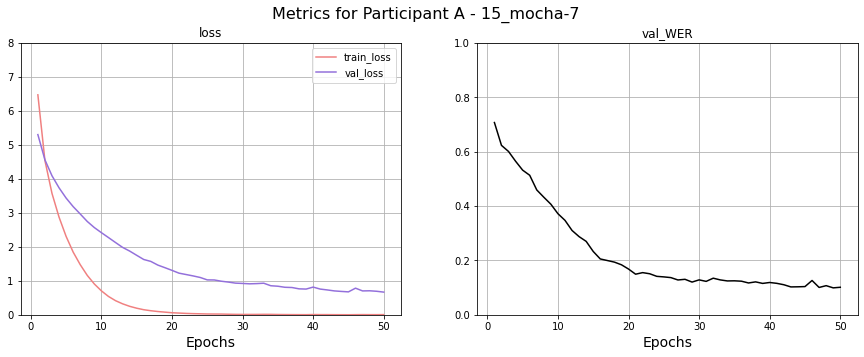

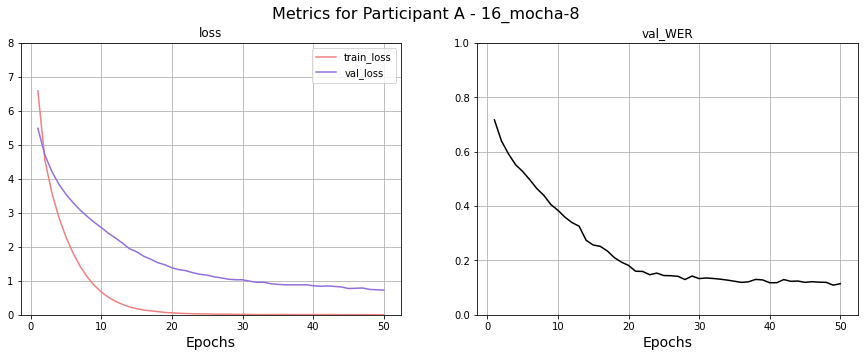

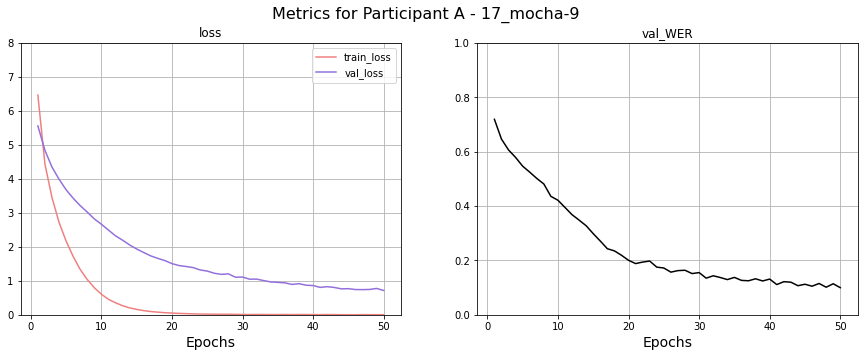

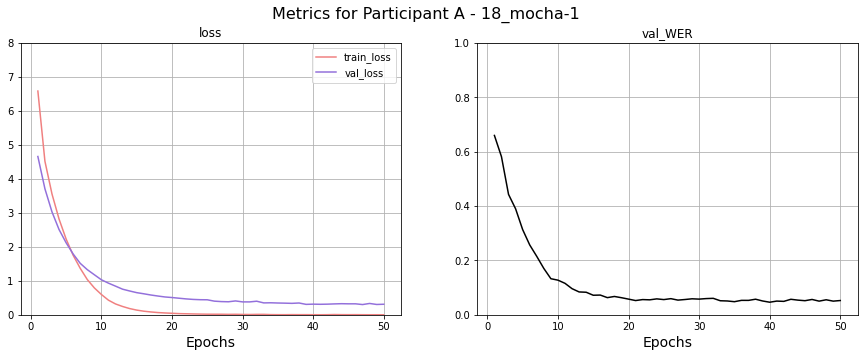

In [7]:
import matplotlib.pyplot as plt
import numpy as np


a = metrics_loo
epochs = np.arange(1,51)

for block in a:
    fig, (ax0, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(15, 5))
    ax0.set_title('loss')
    #print(a[block]['train_loss'])
    ax0.plot(epochs, a[block]['train_loss'], color='lightcoral', label='train_loss')
    ax0.plot(epochs, a[block]['val_loss'], color='mediumpurple', label='val_loss')
    ax0.set_ylim(0, 8.0)
    ax0.set_xlabel("Epochs", fontsize=14)
    ax0.legend()
    ax0.grid()

    ax2.set_title('val_WER')
    ax2.plot(epochs, a[block]['val_WER'], color='black')
    ax2.set_ylim(0,1.0)
    ax2.set_xlabel("Epochs", fontsize=14)
    ax2.grid()
    fig.suptitle("Metrics for Participant A - " + block, fontsize=16)

    
plt.show()

